In [1]:
import seaborn as sb
import statsmodels as sm
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('wcmatches.csv')
worldcups = pd.read_csv('worldcups.csv')


In [3]:
worldcups

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
4,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000
5,1958,Sweden,Brazil,Sweden,France,West Germany,126,16,35,868000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,776000
7,1966,England,England,West Germany,Portugal,Soviet Union,89,16,32,1614677
8,1970,Mexico,Brazil,Italy,West Germany,Uruguay,95,16,32,1673975
9,1974,Germany,West Germany,Netherlands,Poland,Brazil,97,16,38,1774022


In [4]:
matches.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [8]:
matches.drop('dayofweek', axis=1)

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Sochi,Quarterfinals,Russia,Croatia,2,2,A,Croatia won in penalties (4 - 3),Croatia,Russia,2018-07-07,Jul
896,2018,Russia,Saint Petersburg,Semifinals,France,Belgium,1,0,H,NaN,France,Belgium,2018-07-10,Jul
897,2018,Russia,Moscow,Semifinals,Croatia,England,2,1,H,Croatia won in AET,Croatia,England,2018-07-11,Jul
898,2018,Russia,Saint Petersburg,Third place,Belgium,England,2,0,H,NaN,Belgium,England,2018-07-14,Jul


In [9]:
matches.drop('month', axis=1)

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Sochi,Quarterfinals,Russia,Croatia,2,2,A,Croatia won in penalties (4 - 3),Croatia,Russia,2018-07-07,Saturday
896,2018,Russia,Saint Petersburg,Semifinals,France,Belgium,1,0,H,NaN,France,Belgium,2018-07-10,Tuesday
897,2018,Russia,Moscow,Semifinals,Croatia,England,2,1,H,Croatia won in AET,Croatia,England,2018-07-11,Wednesday
898,2018,Russia,Saint Petersburg,Third place,Belgium,England,2,0,H,NaN,Belgium,England,2018-07-14,Saturday


In [12]:
matches.isnull().sum()

year                0
country             0
city                0
stage               0
home_team           0
away_team           0
home_score          0
away_score          0
outcome             0
win_conditions    838
winning_team      169
losing_team       169
date                0
month               0
dayofweek           0
dtype: int64

In [17]:
matches["winning_team"].fillna("Draw", inplace = True)

In [18]:
matches["losing_team"].fillna("Draw", inplace = True)

In [23]:
matches.isnull().sum()

year                0
country             0
city                0
stage               0
home_team           0
away_team           0
home_score          0
away_score          0
outcome             0
win_conditions    838
winning_team        0
losing_team         0
date                0
month               0
dayofweek           0
dtype: int64

In [24]:
matches.info

<bound method DataFrame.info of      year  country              city          stage  home_team      away_team  \
0    1930  Uruguay        Montevideo        Group 1     France         Mexico   
1    1930  Uruguay        Montevideo        Group 4    Belgium  United States   
2    1930  Uruguay        Montevideo        Group 2     Brazil     Yugoslavia   
3    1930  Uruguay        Montevideo        Group 3       Peru        Romania   
4    1930  Uruguay        Montevideo        Group 1  Argentina         France   
..    ...      ...               ...            ...        ...            ...   
895  2018   Russia             Sochi  Quarterfinals     Russia        Croatia   
896  2018   Russia  Saint Petersburg     Semifinals     France        Belgium   
897  2018   Russia            Moscow     Semifinals    Croatia        England   
898  2018   Russia  Saint Petersburg    Third place    Belgium        England   
899  2018   Russia            Moscow          Final     France        Croatia

In [25]:
df = matches.filter(['year','country','stage','home_team','away_team','home_score','away_score','outcome','winning_team','date'], axis=1)

In [27]:
df1 = matches.filter(['year','country','stage','home_team','away_team','winning_team','date'], axis=1)

In [58]:
df2 = matches.filter(['home_team','away_team','winning_team'], axis=1)

In [26]:
df.columns.values.tolist()

['year',
 'country',
 'stage',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'outcome',
 'winning_team',
 'date']

In [28]:
df1.columns.values.tolist()

['year', 'country', 'stage', 'home_team', 'away_team', 'winning_team', 'date']

In [29]:
from sklearn.model_selection import train_test_split
X = df1.drop('winning_team',axis=1)
y = df1['winning_team']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn import preprocessing
# select all categorical variables
df_categorical = df1.select_dtypes(include=['object'])
df_categorical.head()

,country,stage,home_team,away_team,winning_team,date
0,Uruguay,Group 1,France,Mexico,France,1930-07-13
1,Uruguay,Group 4,Belgium,United States,United States,1930-07-13
2,Uruguay,Group 2,Brazil,Yugoslavia,Yugoslavia,1930-07-14
3,Uruguay,Group 3,Peru,Romania,Romania,1930-07-14
4,Uruguay,Group 1,Argentina,France,Argentina,1930-07-15


In [38]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,country,stage,home_team,away_team,winning_team,date
0,16,3,27,42,22,0
1,16,6,5,76,62,0
2,16,4,8,80,66,1
3,16,5,52,56,45,1
4,16,3,2,27,1,2


In [39]:
# concat df_categorical with original df
df1 = df1.drop(df_categorical.columns, axis=1)
df1 = pd.concat([df1, df_categorical], axis=1)
df1.head()

,year,country,stage,home_team,away_team,winning_team,date
0,1930,16,3,27,42,22,0
1,1930,16,6,5,76,62,0
2,1930,16,4,8,80,66,1
3,1930,16,5,52,56,45,1
4,1930,16,3,2,27,1,2


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          900 non-null    int64
 1   country       900 non-null    int32
 2   stage         900 non-null    int32
 3   home_team     900 non-null    int32
 4   away_team     900 non-null    int32
 5   winning_team  900 non-null    int32
 6   date          900 non-null    int32
dtypes: int32(6), int64(1)
memory usage: 28.2 KB


In [42]:
# convert target variable income to categorical
df1['winning_team'] = df1['winning_team'].astype('category')
df1['winning_team'].head()

0    22
1    62
2    66
3    45
4     1
Name: winning_team, dtype: category
Categories (67, int64): [0, 1, 2, 3, ..., 63, 64, 65, 66]

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          900 non-null    int64   
 1   country       900 non-null    int32   
 2   stage         900 non-null    int32   
 3   home_team     900 non-null    int32   
 4   away_team     900 non-null    int32   
 5   winning_team  900 non-null    category
 6   date          900 non-null    int32   
dtypes: category(1), int32(5), int64(1)
memory usage: 28.2 KB


In [45]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [46]:
# Putting feature variable to X
X = df1.drop('winning_team',axis=1)

# Putting response variable to y
y = df1['winning_team']

In [79]:
# Splitting the data into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train1.head()

,home_team_Algeria,home_team_Angola,home_team_Argentina,home_team_Australia,home_team_Austria,home_team_Belgium,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Brazil,home_team_Bulgaria,...,away_team_Tunisia,away_team_Turkey,away_team_Ukraine,away_team_United Arab Emirates,away_team_United States,away_team_Uruguay,away_team_Wales,away_team_West Germany,away_team_Yugoslavia,away_team_Zaire
511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_test1.head()

,year,country,stage,home_team,away_team,date
63,1950,1,3,8,80,30
126,1958,13,6,25,66,49
219,1970,8,4,68,77,81
266,1974,5,9,44,8,96
542,1998,4,14,44,65,213


In [49]:
y_train.head()

511    57
827     4
558    17
497    34
586    17
Name: winning_team, dtype: category
Categories (67, int64): [0, 1, 2, 3, ..., 63, 64, 65, 66]

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
pred = knn.predict(X_test)

In [82]:
comp_result = pd.DataFrame(y_test)
comp_result['pred']= pred
comp_result

,winning_team,pred
70,Draw,West Germany
827,Belgium,United States
231,Brazil,Brazil
588,Brazil,Brazil
39,France,France
...,...,...
506,Bulgaria,Draw
653,Italy,Republic of Ireland
638,South Korea,Spain
752,Spain,Argentina


In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred))

                        precision    recall  f1-score   support

               Algeria       0.00      0.00      0.00         1
             Argentina       0.43      0.71      0.54        14
             Australia       0.00      0.00      0.00         2
               Austria       0.00      0.00      0.00         0
               Belgium       0.33      0.29      0.31         7
Bosnia and Herzegovina       0.00      0.00      0.00         0
                Brazil       0.51      0.92      0.66        24
              Bulgaria       0.00      0.00      0.00         2
              Cameroon       0.50      0.50      0.50         2
                 Chile       0.00      0.00      0.00         3
              Colombia       0.00      0.00      0.00         0
            Costa Rica       0.00      0.00      0.00         2
               Croatia       0.00      0.00      0.00         4
        Czechoslovakia       0.67      0.50      0.57         4
               Denmark       0.00      

In [84]:
print(confusion_matrix(y_test,pred))

[[ 0  0  0 ...  0  1  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  3  0]
 [ 0  1  0 ...  0  4  2]
 [ 0  0  0 ...  0  0  1]]


In [85]:
print(accuracy_score(y_test, pred))

0.3333333333333333


In [56]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

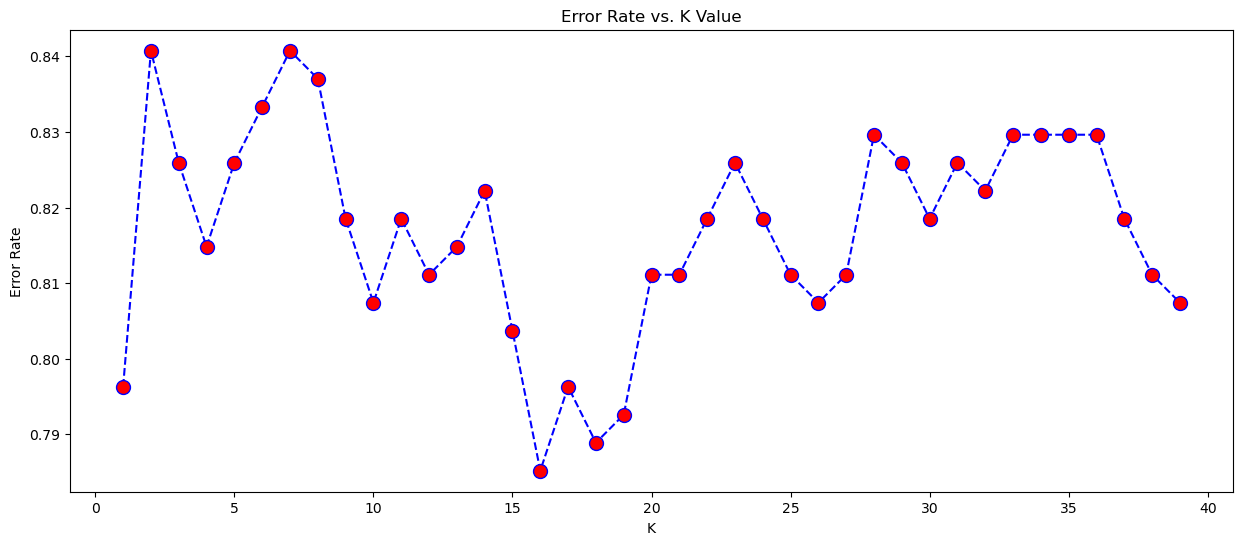

In [57]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
df2

,home_team,away_team,winning_team
0,France,Mexico,France
1,Belgium,United States,United States
2,Brazil,Yugoslavia,Yugoslavia
3,Peru,Romania,Romania
4,Argentina,France,Argentina
...,...,...,...
895,Russia,Croatia,Croatia
896,France,Belgium,France
897,Croatia,England,Croatia
898,Belgium,England,Belgium


In [64]:
df2 = df2.reset_index(drop=True)
df2.loc[df2.winning_team == df2.home_team,'winning_team']=1
df2.loc[df2.winning_team == df2.away_team, 'winning_team']=2
df2 = df2.drop(['winning_team'], axis=1)

df2.head()

AttributeError: 'DataFrame' object has no attribute 'winning_team'

In [62]:
final = pd.get_dummies(df2, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

KeyError: "['winning_team'] not found in axis"

In [68]:
df3 = matches.filter(['home_team','away_team','winning_team'], axis=1)

In [69]:
df3

,home_team,away_team,winning_team
0,France,Mexico,France
1,Belgium,United States,United States
2,Brazil,Yugoslavia,Yugoslavia
3,Peru,Romania,Romania
4,Argentina,France,Argentina
...,...,...,...
895,Russia,Croatia,Croatia
896,France,Belgium,France
897,Croatia,England,Croatia
898,Belgium,England,Belgium


In [71]:


df3 = df3.reset_index(drop=True)
df3.loc[df3.winning_team == df3.home_team,'winning_team1']=1
df3.loc[df3.winning_team == df3.away_team, 'winning_team1']=2
df3 = df3.drop(['winning_team1'], axis=1)

df3.head()

,home_team,away_team,winning_team
0,France,Mexico,France
1,Belgium,United States,United States
2,Brazil,Yugoslavia,Yugoslavia
3,Peru,Romania,Romania
4,Argentina,France,Argentina


In [86]:
final = pd.get_dummies(df3, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.773
Test set accuracy:  0.411


In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test, y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

                precision    recall  f1-score   support

       Algeria       0.00      0.00      0.00         1
     Argentina       0.61      0.79      0.69        14
     Australia       0.00      0.00      0.00         2
       Belgium       0.00      0.00      0.00         7
        Brazil       0.65      0.83      0.73        24
      Bulgaria       0.00      0.00      0.00         2
      Cameroon       0.00      0.00      0.00         2
         Chile       0.00      0.00      0.00         3
    Costa Rica       0.00      0.00      0.00         2
       Croatia       0.00      0.00      0.00         4
Czechoslovakia       0.00      0.00      0.00         4
       Denmark       0.00      0.00      0.00         9
          Draw       0.16      0.64      0.26        45
  East Germany       0.00      0.00      0.00         1
       England       0.00      0.00      0.00         7
 FR Yugoslavia       0.00      0.00      0.00         1
        France       0.50      0.62      0.56  

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

                precision    recall  f1-score   support

       Algeria       0.00      0.00      0.00         1
     Argentina       0.69      0.79      0.73        14
     Australia       0.00      0.00      0.00         2
       Austria       0.00      0.00      0.00         0
       Belgium       0.67      0.57      0.62         7
        Brazil       0.67      0.92      0.77        24
      Bulgaria       0.00      0.00      0.00         2
      Cameroon       0.00      0.00      0.00         2
         Chile       0.00      0.00      0.00         3
      Colombia       0.00      0.00      0.00         0
    Costa Rica       0.00      0.00      0.00         2
       Croatia       1.00      0.50      0.67         4
Czechoslovakia       0.00      0.00      0.00         4
       Denmark       0.00      0.00      0.00         9
          Draw       0.16      0.18      0.17        45
  East Germany       0.00      0.00      0.00         1
       England       0.38      0.71      0.50  

In [91]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

                precision    recall  f1-score   support

       Algeria       0.00      0.00      0.00         1
     Argentina       0.71      0.86      0.77        14
     Australia       0.00      0.00      0.00         2
       Austria       0.00      0.00      0.00         0
       Belgium       0.71      0.71      0.71         7
        Brazil       0.65      1.00      0.79        24
      Bulgaria       0.00      0.00      0.00         2
      Cameroon       0.00      0.00      0.00         2
         Chile       1.00      0.67      0.80         3
      Colombia       0.00      0.00      0.00         0
    Costa Rica       0.00      0.00      0.00         2
       Croatia       1.00      0.25      0.40         4
Czechoslovakia       0.33      0.25      0.29         4
       Denmark       0.00      0.00      0.00         9
          Draw       0.14      0.24      0.18        45
  East Germany       0.00      0.00      0.00         1
       England       0.44      0.57      0.50  

In [92]:
# solver >> Algorithm to use in the optimization problem.
logmodel = LogisticRegression(solver='newton-cg')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

                precision    recall  f1-score   support

       Algeria       0.00      0.00      0.00         1
     Argentina       0.71      0.86      0.77        14
     Australia       0.00      0.00      0.00         2
       Austria       0.00      0.00      0.00         0
       Belgium       0.71      0.71      0.71         7
        Brazil       0.65      1.00      0.79        24
      Bulgaria       0.00      0.00      0.00         2
      Cameroon       0.00      0.00      0.00         2
         Chile       1.00      0.67      0.80         3
      Colombia       0.00      0.00      0.00         0
    Costa Rica       0.00      0.00      0.00         2
       Croatia       1.00      0.25      0.40         4
Czechoslovakia       0.33      0.25      0.29         4
       Denmark       0.00      0.00      0.00         9
          Draw       0.14      0.24      0.18        45
  East Germany       0.00      0.00      0.00         1
       England       0.44      0.57      0.50  